In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
path = "Gold_futures.csv"
gold_df=pd.read_csv(path)

In [3]:
gold_df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/01/2010,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184.0


In [4]:
gold_df.dropna(inplace = True)

In [5]:
gold_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df_g=gold_df.copy()

In [7]:
df_g["Date"]=pd.to_datetime(df_g["Date"],format='%d/%m/%Y')
df_g.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184.0


In [8]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 3066
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2518 non-null   datetime64[ns]
 1   Open       2518 non-null   float64       
 2   High       2518 non-null   float64       
 3   Low        2518 non-null   float64       
 4   Close      2518 non-null   float64       
 5   Adj Close  2518 non-null   float64       
 6   Volume     2518 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 157.4 KB


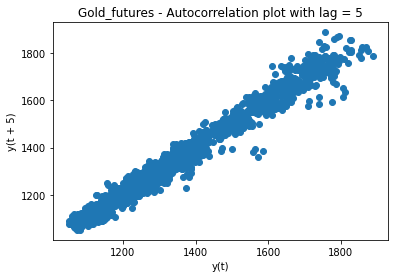

In [9]:
plt.figure()
lag_plot(df_g['Close'], lag=5)
plt.title('Gold_futures - Autocorrelation plot with lag = 5')
plt.show()

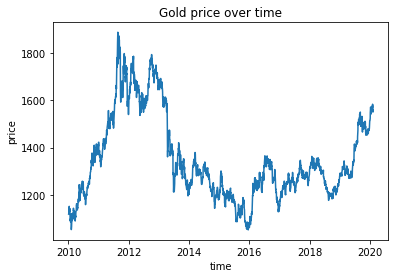

In [10]:
plt.plot(df_g["Date"], df_g["Close"])
# plt.xticks(np.arange(0,2485,100), df1['Date'][0:2485:100])
plt.title("Gold price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [11]:
train_data, test_data = df_g[0:int(len(df_g)*0.8)], df_g[int(len(df_g)*0.8):]

In [12]:
training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #yhat = output[0][0]
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

   
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 91.67751282915549


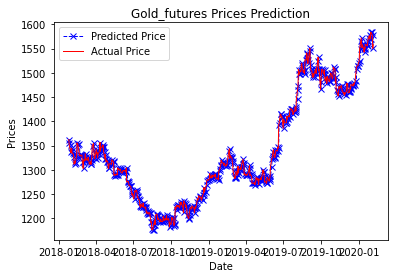

In [13]:
test_set_range = df_g[int(len(df_g)*0.8):].Date
plt.plot(test_set_range, model_predictions, color='blue', marker='x', linestyle='dashed',label='Predicted Price', lw=1)
plt.plot(test_set_range, test_data, color='red', label='Actual Price', lw=1)
plt.title('Gold_futures Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), df1.Date[881:1259:50])
plt.legend()
plt.show()

In [14]:
date_df=pd.DataFrame(df_g[int(len(df_g)*0.8):].Date)
df_test = pd.DataFrame(data=test_data)
df_preds = pd.DataFrame(data=model_predictions)

display(date_df.head(3), df_test.head(3), df_preds.head(3))

,Date
2450,2018-01-25
2451,2018-01-26
2454,2018-01-30


,0
0,1362.400024
1,1351.599976
2,1335.400024


,0
0,1355.496657
1,1362.213368
2,1352.119984


In [15]:
date_df.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_preds.reset_index(drop=True, inplace=True)

df_preds = df_preds.shift(periods=-1)

# p = p.iloc[:-1]
# t = t.iloc[:-1]

frames=[date_df['Date'],df_test[0],df_preds[0]]
headers=['Date','test','preds']
graphdata_gold= pd.concat(frames, axis=1, keys=headers)

# graphdata = df_test.merge(df_preds, how='inner', suffixes=('_actual', '_prediction'))
graphdata_gold

,Date,test,preds
0,2018-01-25,1362.400024,1362.213368
1,2018-01-26,1351.599976,1352.119984
2,2018-01-30,1335.400024,1336.142190
3,2018-01-31,1339.000000,1339.130101
4,2018-02-01,1344.300049,1344.069769
...,...,...,...
499,2020-01-30,1583.500000,1583.289469
500,2020-01-31,1582.900024,1583.033631
501,2020-02-03,1577.199951,1577.600363
502,2020-02-04,1550.400024,1551.335894


In [17]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure([

    go.Scatter(
        name='Actual',
        x=graphdata_gold.Date,
        y=graphdata_gold['test'],
        mode='lines',
        marker=dict(color="#008080"),
        line=dict(width=1),
        showlegend=True
    ),
    go.Scatter(
        name='Prediction',
        x=graphdata_gold.Date,
        y=graphdata_gold['preds'],
        marker=dict(color="#FF8C00"),
        line=dict(width=1),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        showlegend=True
    )
])

fig.update_layout(
    yaxis_title='',
    title='',
    hovermode="x"
)

fig.show()
